In [48]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment 3 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment 3 
Number of the dataset : 3



In [10]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score


from collections import Counter

In [3]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

In [45]:

###(a) Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the
#lecture on all of the nodes. Please compare the results. What cause the difference between the
#results?

# Calculate Betweenness, Closeness, and PageRank
betweenness_centrality = nx.betweenness_centrality(facebook_network)
closeness_centrality = nx.closeness_centrality(facebook_network)
pagerank = nx.pagerank(facebook_network)

# Print the results
print("Betweenness Centrality:")
for node, value in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")

print("\nCloseness Centrality:")
for node, value in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")

print("\nPageRank:")
for node, value in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")


print("""
Comparison of the results of the Facebook-Ego network:

1. Betweenness Centrality:
   - Interpretation:High betweenness centrality indicates nodes that act as crucial bridges or connectors in the network.
   - Differences: Nodes with high betweenness centrality (e.g., Node 376) are likely positioned on many shortest paths between other nodes.
       This measure is sensitive to nodes that facilitate communication between different parts of the network.

2. Closeness Centrality:
   - Interpretation: High closeness centrality indicates nodes that are close to all other nodes in the network, emphasizing efficient information flow.
   - Differences: Nodes with high closeness centrality (e.g., Node 376) are well-connected to other nodes, reducing the average distance to reach other nodes. 
      This measure focuses on the proximity of a node to all other nodes in the network.

3. PageRank:
   - Interpretation: High PageRank indicates nodes that are important based on the link structure of the network. It is inspired by the idea of web page importance.
   - Differences: Nodes with high PageRank (e.g., Node 376) are considered influential and well-connected, but this measure also considers the importance of the nodes 
      that link to them. It reflects a form of global influence.

Causes of Differences:
   - Network Structure: The Facebook-Ego network may have a structure where certain nodes act as connectors (high betweenness), while others are well-connected (high closeness). 
      The link structure and connectivity patterns play a significant role in these differences.
   - Communication Patterns: Differences in the communication patterns within the network influence betweenness centrality.
      Nodes facilitating communication between different clusters of nodes tend to have higher betweenness.
   - Influence Dynamics: PageRank considers not just direct connections but also the influence of nodes that link to a particular node. 
      If influential nodes link to Node 376, it would contribute to its high PageRank.

In conclusion:
The differences between betweenness centrality, closeness centrality, and PageRank stem from the diverse perspectives they take on node importance. 
      While betweenness focuses on facilitating communication, closeness emphasizes efficient information flow, and PageRank integrates global influence. 
      The network's structure, communication patterns, and influence dynamics collectively contribute to the variations in these centrality measures. 
      """)

Betweenness Centrality:
Node 376: 0.07624629563517955
Node 419: 0.07372929448948545
Node 475: 0.0544538189057086
Node 431: 0.0534318619770932
Node 463: 0.052542639950249354

Closeness Centrality:
Node 376: 0.564956956233821
Node 475: 0.5342270799533203
Node 373: 0.5148398068904981
Node 428: 0.51277217714395
Node 412: 0.51277217714395

PageRank:
Node 376: 0.020474515389486823
Node 475: 0.01817712470796593
Node 412: 0.01662490064053971
Node 373: 0.015056821590972207
Node 428: 0.014476689371633673

Comparison of the results of the Facebook-Ego network:

1. Betweenness Centrality:
   - Interpretation:High betweenness centrality indicates nodes that act as crucial bridges or connectors in the network.
   - Differences: Nodes with high betweenness centrality (e.g., Node 376) are likely positioned on many shortest paths between other nodes.
       This measure is sensitive to nodes that facilitate communication between different parts of the network.

2. Closeness Centrality:
   - Interpretat

In [46]:
#(b) Please compare the results in (a). What cause the difference between the results?
print("""
1. Betweenness Centrality:
   - Node 376: Highest betweenness centrality (0.0762)
   - Node 419: Second highest betweenness centrality (0.0737)

   Factors causing differences:
   - Node 376 plays a crucial role in connecting different parts of the network. It lies on many shortest paths between other nodes.
   - Node 419 also has significant betweenness centrality, indicating it is also important in facilitating communication.

2. Closeness Centrality:
   - Node 376: Highest closeness centrality (0.565)
   - Node 475: Second highest closeness centrality (0.534)

   Factors causing differences:
   - Node 376 is very close to other nodes, reducing the average distance to reach all other nodes in the network.
   - Node 475 is also well-connected but slightly less central in terms of closeness.

3. PageRank:
   - Node 376: Highest PageRank (0.0205)
   - Node 475: Second highest PageRank (0.0182)

   Factors causing differences:
   - Node 376 is considered influential and well-connected based on both its direct connections and the influence of nodes that link to it.
   - Node 475 is also influential, contributing to the global influence of the network.

Common Factors:
   - All three measures highlight Node 376 as a prominent node, indicating its significance in the network's structure, communication, and influence dynamics.
   - Differences arise from the unique aspects each centrality measure focuses on (e.g., betweenness on shortest paths, closeness on average distance, PageRank on global influence).

Overall Factors causing differences:
   - Network Topology:** The structure of the Facebook-Ego network, including how nodes are connected and organized, influences the centrality measures.
   - Communication Patterns:** How information flows and is facilitated between nodes contributes to betweenness centrality.
   - Link Structure:** PageRank is influenced by both direct connections and the quality of incoming links.

Conclusion:
   - The differences in centrality measures arise from the distinct perspectives they provide on node importance, 
      capturing different aspects of a node's role in the network.

""")


1. Betweenness Centrality:
   - Node 376: Highest betweenness centrality (0.0762)
   - Node 419: Second highest betweenness centrality (0.0737)

   Factors causing differences:
   - Node 376 plays a crucial role in connecting different parts of the network. It lies on many shortest paths between other nodes.
   - Node 419 also has significant betweenness centrality, indicating it is also important in facilitating communication.

2. Closeness Centrality:
   - Node 376: Highest closeness centrality (0.565)
   - Node 475: Second highest closeness centrality (0.534)

   Factors causing differences:
   - Node 376 is very close to other nodes, reducing the average distance to reach all other nodes in the network.
   - Node 475 is also well-connected but slightly less central in terms of closeness.

3. PageRank:
   - Node 376: Highest PageRank (0.0205)
   - Node 475: Second highest PageRank (0.0182)

   Factors causing differences:
   - Node 376 is considered influential and well-connected b

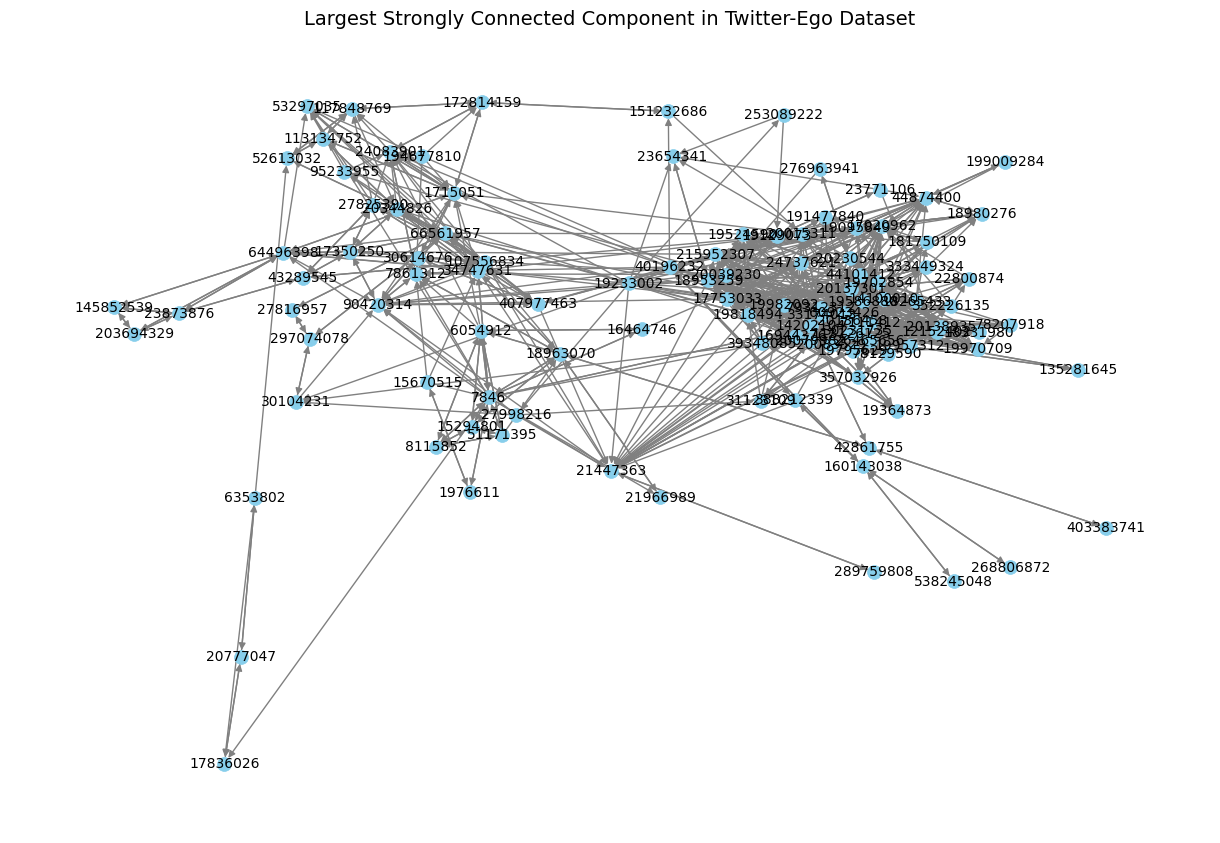

In [47]:
#(c) Please plot the largest strong connected component in the Twitter-Ego dataset.

# Find the strongly connected components
strongly_connected_components = nx.strongly_connected_components(twitter_network)

# Find the largest strongly connected component
largest_strongly_connected_component = max(strongly_connected_components, key=len)

# Create a subgraph containing only the largest strongly connected component
largest_strongly_connected_subgraph = twitter_network.subgraph(largest_strongly_connected_component)

# Plot the largest strongly connected component  
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(largest_strongly_connected_subgraph)
nx.draw(
    largest_strongly_connected_subgraph,
    pos,
    with_labels=True,
    node_size=100,   
    node_color='skyblue',
    font_size=10,  
    font_color='black',
    edge_color='gray',
    linewidths=0.5,
)
plt.title('Largest Strongly Connected Component in Twitter-Ego Dataset', fontsize=14)
plt.show()



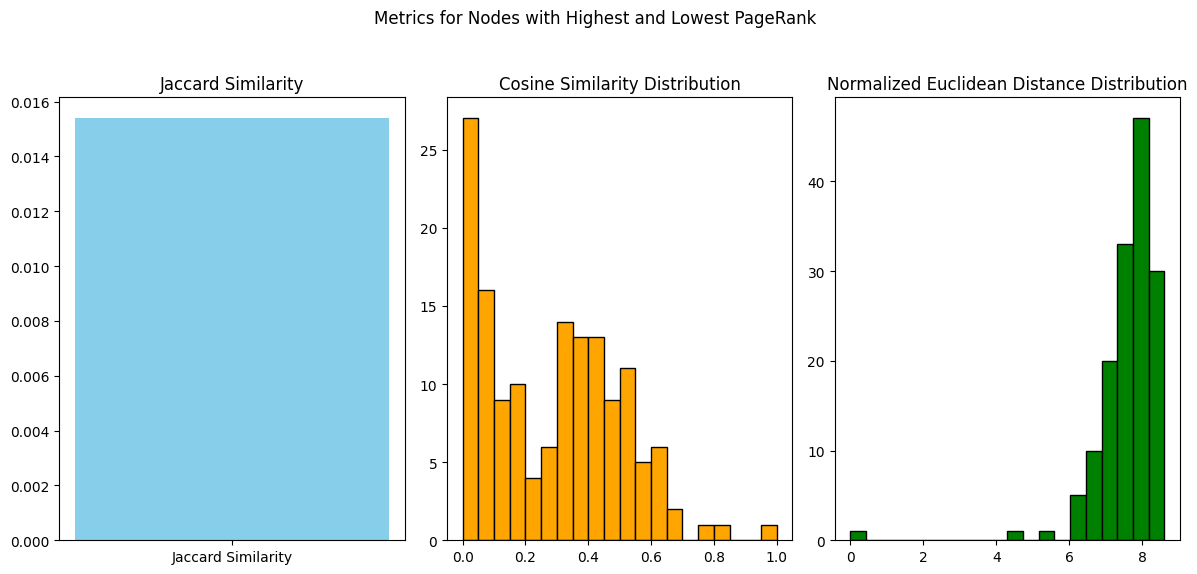

In [14]:
###(d) Choose the results of one of the two algorithms mentioned in question (a), and choose the node
#with the highest value and the node with lowest value. Please plot the distributions of Jaccard
#similarity, cosine similarity and normalized Euclidean distance between either of the two nodes
#and the rest of the nodes in the graph.

# Calculate PageRank
pagerank = nx.pagerank(facebook_network)

# Find the node with the highest PageRank value
highest_pagerank_node = max(pagerank, key=pagerank.get)

# Find the node with the lowest PageRank value
lowest_pagerank_node = min(pagerank, key=pagerank.get)

# Get the subgraph with the neighbors of the highest and lowest PageRank nodes
highest_pagerank_neighbors = set(facebook_network.neighbors(highest_pagerank_node))
lowest_pagerank_neighbors = set(facebook_network.neighbors(lowest_pagerank_node))

# Convert node identifiers to array indices
node_indices = list(facebook_network.nodes())
highest_pagerank_index = node_indices.index(highest_pagerank_node)
lowest_pagerank_index = node_indices.index(lowest_pagerank_node)

# Calculate Jaccard similarity
common_neighbors = highest_pagerank_neighbors.intersection(lowest_pagerank_neighbors)
all_neighbors = highest_pagerank_neighbors.union(lowest_pagerank_neighbors)
jaccard_similarity = len(common_neighbors) / len(all_neighbors) if len(all_neighbors) > 0 else 0

# Calculate Cosine similarity and Normalized Euclidean distance
node_features = nx.to_numpy_array(facebook_network)
highest_pagerank_features = node_features[highest_pagerank_index]
lowest_pagerank_features = node_features[lowest_pagerank_index]

cosine_sim = cosine_similarity([highest_pagerank_features], node_features)[0]
euclidean_dist = euclidean_distances([highest_pagerank_features], node_features)[0]

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(['Jaccard Similarity'], [jaccard_similarity], color='skyblue')
plt.title('Jaccard Similarity')

plt.subplot(1, 3, 2)
plt.hist(cosine_sim, bins=20, color='orange', edgecolor='black')
plt.title('Cosine Similarity Distribution')

plt.subplot(1, 3, 3)
plt.hist(euclidean_dist, bins=20, color='green', edgecolor='black')
plt.title('Normalized Euclidean Distance Distribution')

plt.suptitle('Metrics for Nodes with Highest and Lowest PageRank')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
